In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Basics

In [3]:
df = pd.read_csv('Company_Fin_data.csv')

In [4]:
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,...,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,...,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,...,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,...,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [5]:
df.shape

(4256, 51)

In [6]:
df.columns

Index(['Num', 'Networth Next Year', 'Total assets', 'Net worth',
       'Total income', 'Change in stock', 'Total expenses', 'Profit after tax',
       'PBDITA', 'PBT', 'Cash profit', 'PBDITA as % of total income',
       'PBT as % of total income', 'PAT as % of total income',
       'Cash profit as % of total income', 'PAT as % of net worth', 'Sales',
       'Income from fincial services', 'Other income', 'Total capital',
       'Reserves and funds', 'Borrowings', 'Current liabilities & provisions',
       'Deferred tax liability', 'Shareholders funds',
       'Cumulative retained profits', 'Capital employed', 'TOL/TNW',
       'Total term liabilities / tangible net worth',
       'Contingent liabilities / Net worth (%)', 'Contingent liabilities',
       'Net fixed assets', 'Investments', 'Current assets',
       'Net working capital', 'Quick ratio (times)', 'Current ratio (times)',
       'Debt to equity ratio (times)', 'Cash to current liabilities (times)',
       'Cash to average c

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Num                                          4256 non-null   int64  
 1   Networth Next Year                           4256 non-null   float64
 2   Total assets                                 4256 non-null   float64
 3   Net worth                                    4256 non-null   float64
 4   Total income                                 4025 non-null   float64
 5   Change in stock                              3706 non-null   float64
 6   Total expenses                               4091 non-null   float64
 7   Profit after tax                             4102 non-null   float64
 8   PBDITA                                       4102 non-null   float64
 9   PBT                                          4102 non-null   float64
 10  

### Fixing column names

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.replace('%', 'perc').str.replace('/', '_to_')\
.str.replace('(', '').str.replace(')', '').str.replace('&', '').str.replace('__', '_')
df.columns

Index(['Num', 'Networth_Next_Year', 'Total_assets', 'Net_worth',
       'Total_income', 'Change_in_stock', 'Total_expenses', 'Profit_after_tax',
       'PBDITA', 'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_fincial_services', 'Other_income',
       'Total_capital', 'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_provisions', 'Deferred_tax_liability',
       'Shareholders_funds', 'Cumulative_retained_profits', 'Capital_employed',
       'TOL_to_TNW', 'Total_term_liabilities_to_tangible_net_worth',
       'Contingent_liabilities_to_Net_worth_perc', 'Contingent_liabilities',
       'Net_fixed_assets', 'Investments', 'Current_assets',
       'Net_working_capital', 'Quick_ratio_times', 'Current_ratio_times',
       'Debt_to_equity_ratio_times', 'Cash_to_current_liabilities_times',
       'Cash_t

## Treating Missing values

In [9]:
missing_pct = (df.isnull().sum().sum() / df.size) * 100
print(f'Proportion of values missing is {missing_pct:.2f}%')

Proportion of values missing is 8.19%


In [10]:
((df.isnull().sum().sort_values(ascending=False) / df.index.size) * 100).round(2)

PE_on_BSE                                       61.72
Investments                                     40.30
Other_income                                    36.56
Contingent_liabilities                          32.94
Deferred_tax_liability                          32.17
Income_from_fincial_services                    26.10
Finished_goods_turnover                         20.54
Equity_face_value                               19.03
Shares_outstanding                              19.03
WIP_turnover                                    17.95
Change_in_stock                                 12.92
Borrowings                                      10.13
Raw_material_turnover                           10.06
Creditors_turnover                               9.19
Debtors_turnover                                 9.05
Sales                                            7.17
Total_income                                     5.43
Total_expenses                                   3.88
Cash_profit                 

### Dropping features with >30% missing values

In [11]:
df = df.drop(['PE_on_BSE', 'Investments', 'Other_income', 'Contingent_liabilities', 'Deferred_tax_liability'], axis=1)

### Imputing rest of missing values with Mean

In [12]:
df = df.fillna(df.mean())

In [13]:
df.isnull().sum().sum()

0

### Finding constant columns

In [14]:
from sklearn.feature_selection import VarianceThreshold

In [15]:
[int(val) for val in df['Equity_face_value'].unique()]

[10,
 -1094,
 100,
 5,
 8,
 4,
 1,
 2,
 1000,
 25,
 50,
 500,
 10000,
 2,
 -999998,
 250,
 15,
 100000,
 30]

In [16]:
varModel = VarianceThreshold(threshold=0.1)
varModel.fit(df)

VarianceThreshold(threshold=0.1)

In [17]:
constArr = varModel.get_support()
constArr

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [18]:
from collections import Counter

In [19]:
Counter(constArr)

Counter({True: 46})

### Creating default feature

In [20]:
df['default'] = np.where(df['Networth_Next_Year'] > 0,  0, 1)

In [21]:
df['default'].value_counts()

default
0    3352
1     904
Name: count, dtype: int64

In [22]:
df['default'].value_counts(normalize=True) * 100

default
0    78.759398
1    21.240602
Name: proportion, dtype: float64

In [23]:
df.drop(['Num', 'Networth_Next_Year'], axis=1, inplace=True)

In [24]:
df.shape

(4256, 45)

In [25]:
X = df.drop('default', axis=1)
y = df['default']

# EDA

In [26]:
df.describe().round()

,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
count,4256.0,4256.0,4256.0,4256.0,4256.0,4256.0,4256.0,4256.0,4256.0,4256.0,...,4256.0,4256.0,4256.0,4256.0,4.256000e+03,4256.0,4256.0,4256.0,4256.0,4256.0
mean,3574.0,1352.0,4688.0,44.0,4356.0,295.0,606.0,410.0,408.0,3.0,...,18.0,84.0,29.0,18.0,2.376491e+07,-1095.0,-196.0,-198.0,3574.0,0.0
std,30074.0,12961.0,52435.0,408.0,50392.0,3024.0,5543.0,4140.0,4068.0,171.0,...,86.0,502.0,154.0,325.0,1.538465e+08,30684.0,13062.0,13062.0,30074.0,0.0
min,0.0,0.0,0.0,-3029.0,-0.0,-3908.0,-441.0,-3895.0,-2246.0,-6400.0,...,0.0,-0.0,-0.0,-2.0,-2.147484e+09,-999999.0,-843182.0,-843182.0,0.0,0.0
25%,91.0,31.0,121.0,-1.0,105.0,1.0,7.0,1.0,3.0,5.0,...,4.0,10.0,6.0,3.0,2.211746e+06,10.0,0.0,0.0,91.0,0.0
50%,316.0,105.0,520.0,4.0,471.0,10.0,42.0,14.0,22.0,9.0,...,7.0,26.0,13.0,7.0,6.297858e+06,10.0,1.0,1.0,316.0,0.0
75%,1121.0,390.0,1920.0,44.0,1690.0,67.0,192.0,94.0,118.0,16.0,...,16.0,84.0,29.0,16.0,2.376491e+07,10.0,10.0,8.0,1121.0,0.0
max,1176509.0,613152.0,2442828.0,14186.0,2366035.0,119439.0,208576.0,145293.0,176912.0,100.0,...,3135.0,17948.0,5651.0,21092.0,4.130401e+09,100000.0,34523.0,34523.0,1176509.0,1.0


## Outlier Removal

In [27]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 10 * IQR
LL = Q1 - 10 * IQR

In [28]:
((((X > UL) | (X < LL)).sum().sort_values(ascending=False) / X.index.size) * 100).round(2)

Equity_face_value                               31.56
Adjusted_EPS                                     6.02
Net_working_capital                              5.19
EPS                                              4.96
Cumulative_retained_profits                      4.49
Profit_after_tax                                 4.42
PBT                                              4.09
Total_assets                                     4.06
Total_liabilities                                4.06
Capital_employed                                 3.95
Net_worth                                        3.92
Reserves_and_funds                               3.90
Shareholders_funds                               3.85
Cash_to_average_cost_of_sales_per_day            3.78
Net_fixed_assets                                 3.48
Current_liabilities_provisions                   3.41
Cash_profit                                      3.34
Total_capital                                    3.34
PAT_as_perc_of_total_income 

In [29]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(10 * IQR)
    upper_range= Q3+(10 * IQR)
    return lower_range, upper_range

In [30]:
for column in X.columns:
    lr,ur=remove_outlier(X[column])
    X[column]=np.where(X[column]>ur,ur,X[column])
    X[column]=np.where(X[column]<lr,lr,X[column])

## Univariate Analysis

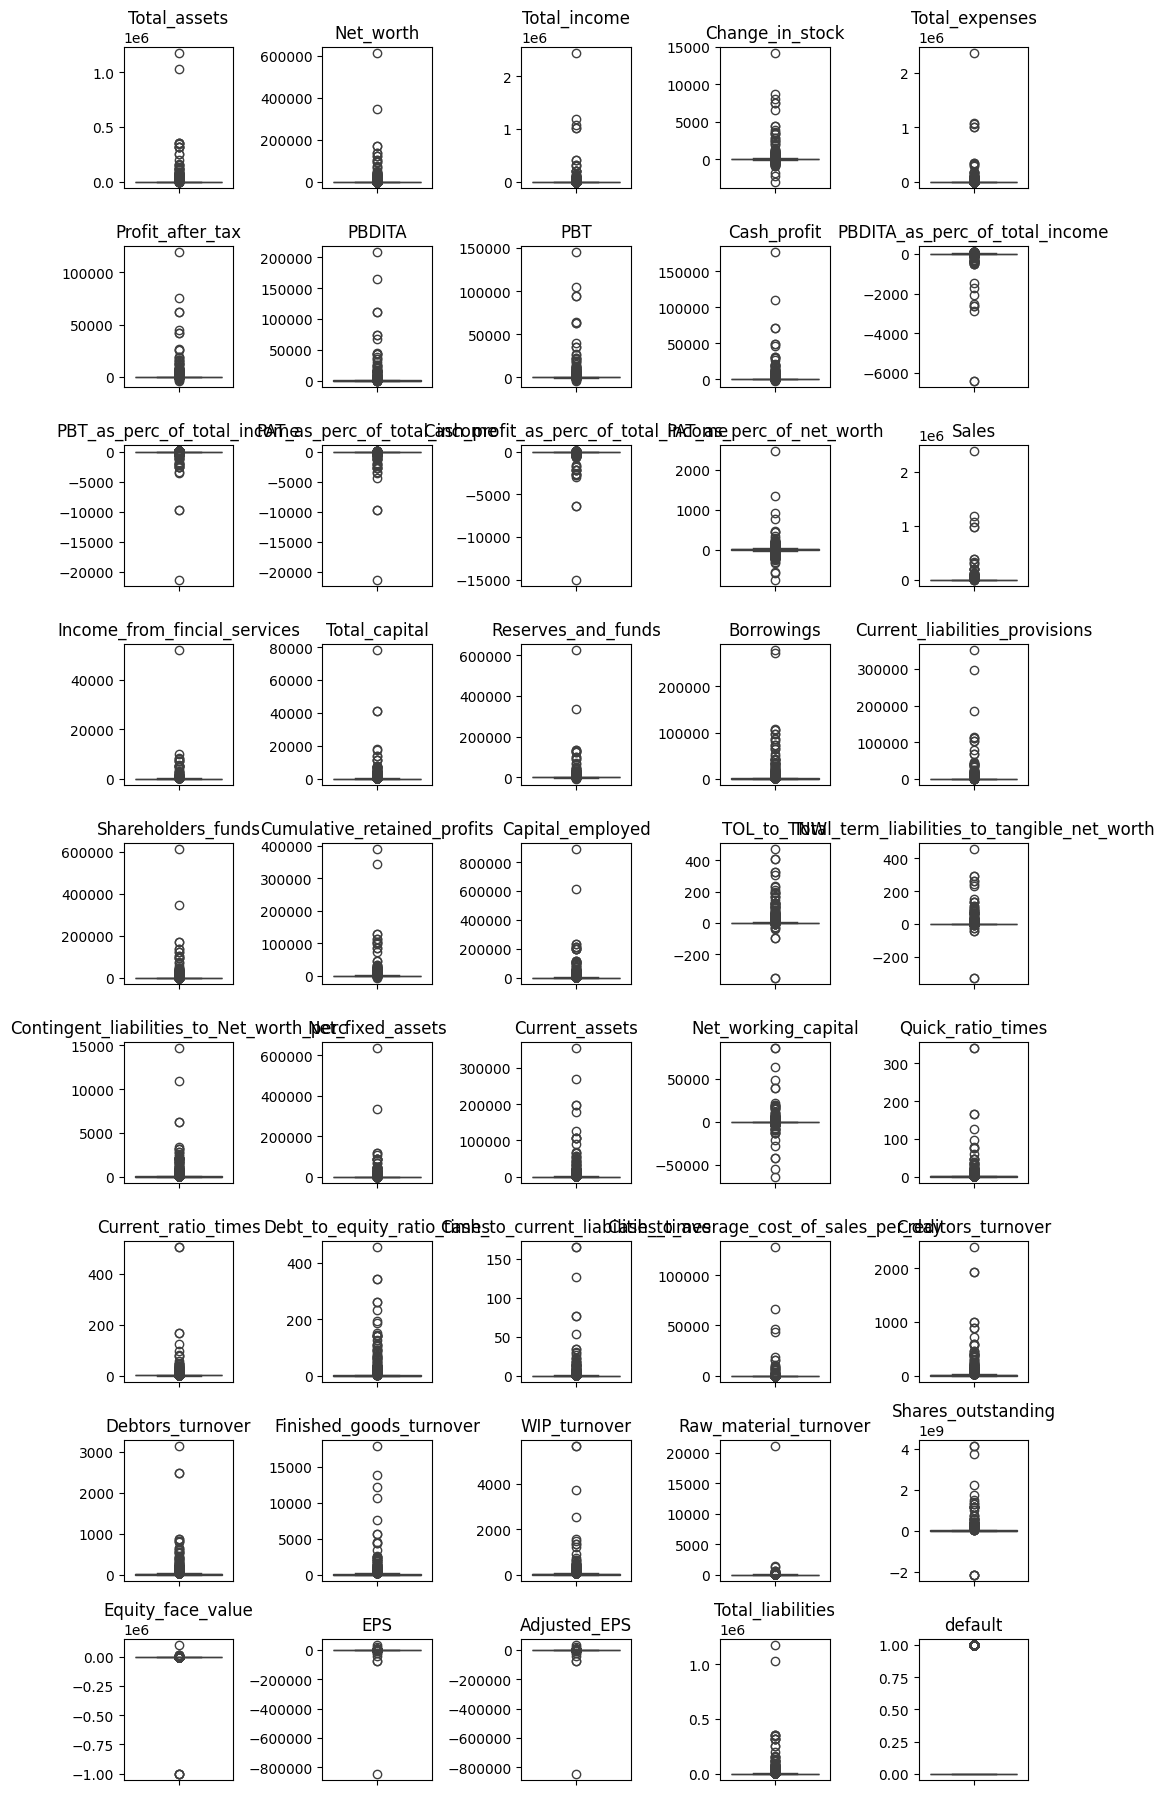

In [31]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(df.columns, 1):
    plt.subplot(10, 5, i) 
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.ylabel(None)
    plt.tight_layout()

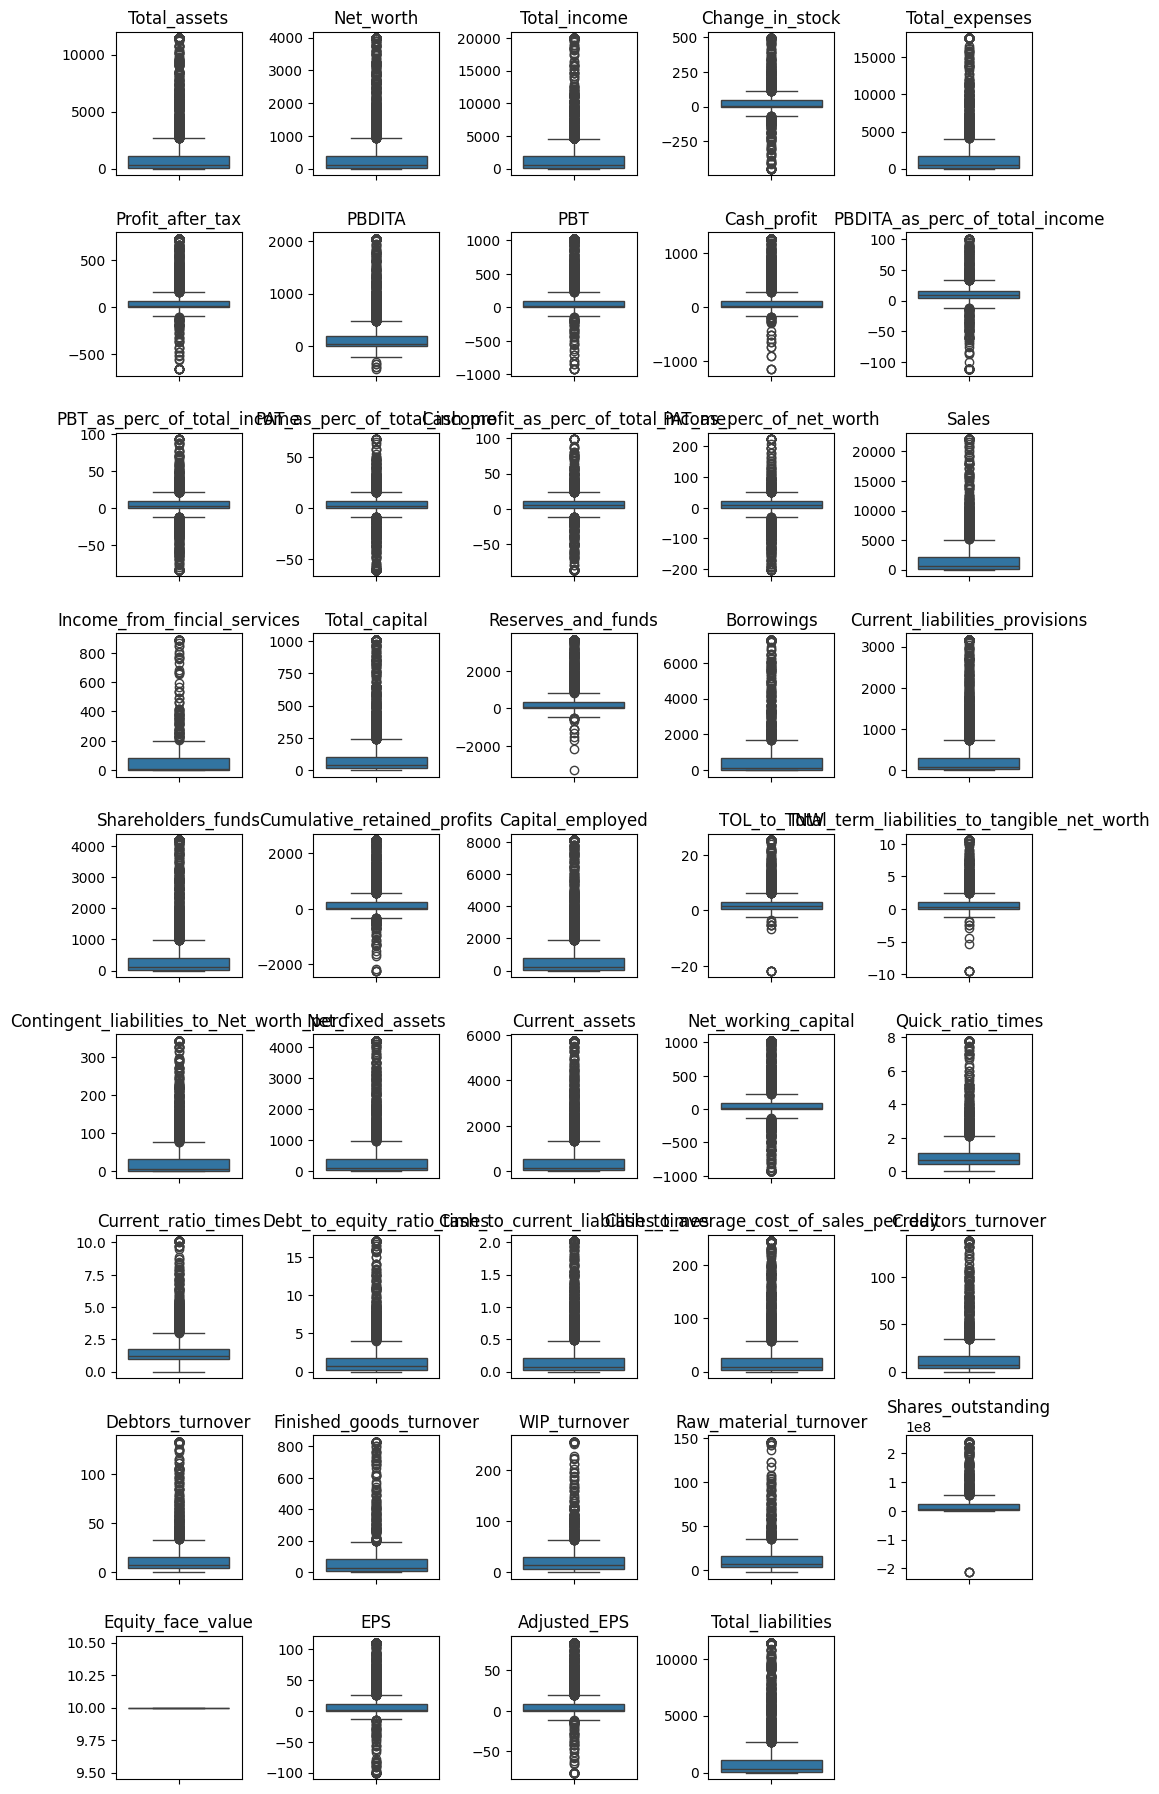

In [32]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(X.columns, 1):
    plt.subplot(10, 5, i) 
    sns.boxplot(y=X[col])
    plt.title(col)
    plt.ylabel(None)
    plt.tight_layout()

## Bivariate Analysis

In [33]:
df_viz = pd.concat([X,y], axis=1)

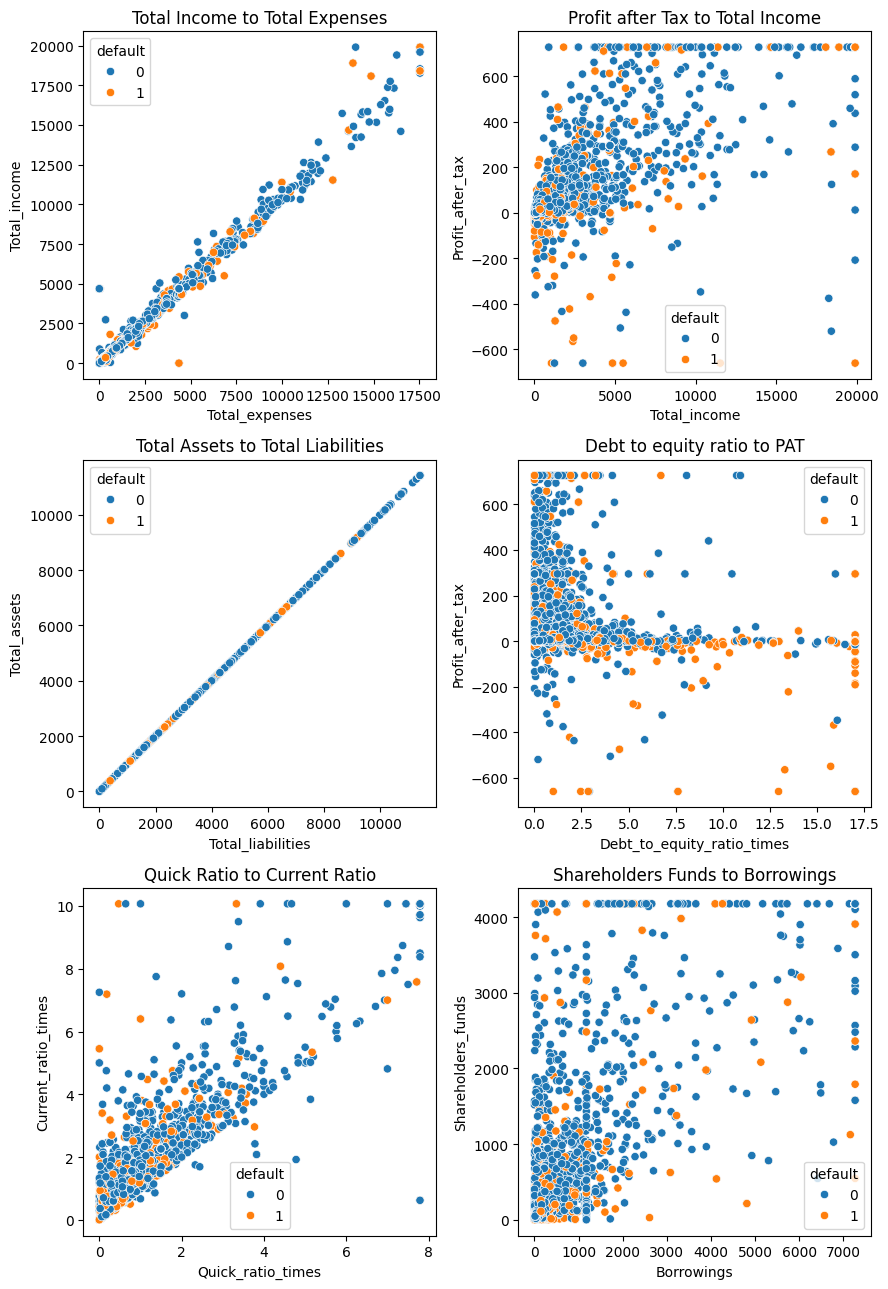

In [34]:
plt.figure(figsize=(9,13))

plt.subplot(321)
sns.scatterplot(data=df_viz, x='Total_expenses', y='Total_income', hue='default');
plt.title('Total Income to Total Expenses')

plt.subplot(322)
sns.scatterplot(data=df_viz, x='Total_income', y='Profit_after_tax', hue='default');
plt.title('Profit after Tax to Total Income')

plt.subplot(323)
sns.scatterplot(data=df_viz, x='Total_liabilities', y='Total_assets', hue='default');
plt.title('Total Assets to Total Liabilities')

plt.subplot(324)
sns.scatterplot(data=df_viz, x='Debt_to_equity_ratio_times', y='Profit_after_tax', hue='default');
plt.title('Debt to equity ratio to PAT')

plt.subplot(325)
sns.scatterplot(data=df_viz, x='Quick_ratio_times', y='Current_ratio_times', hue='default');
plt.title('Quick Ratio to Current Ratio')

plt.subplot(326)
sns.scatterplot(data=df_viz, x='Borrowings', y='Shareholders_funds', hue='default');
plt.title('Shareholders Funds to Borrowings')

plt.tight_layout()

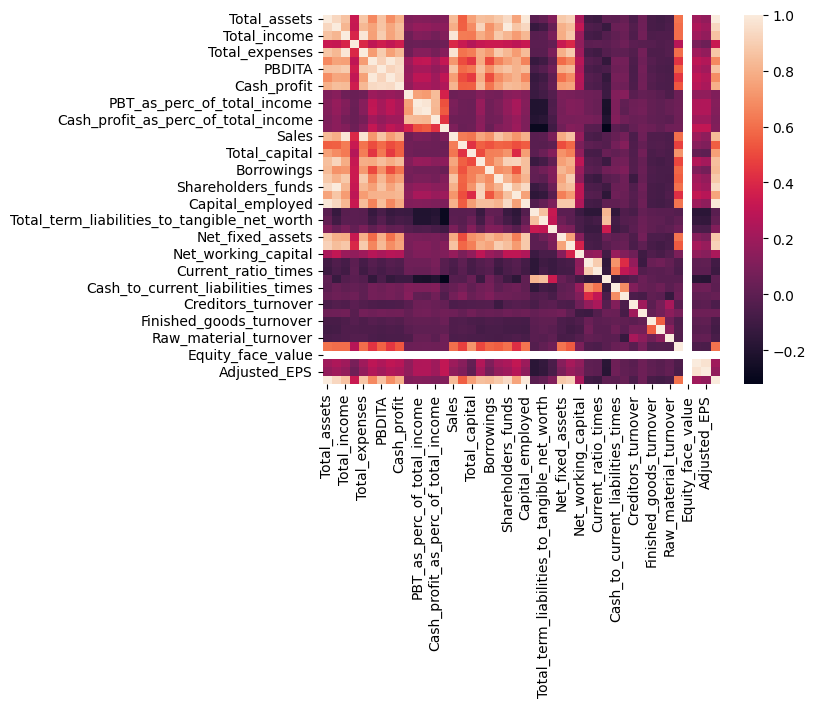

In [35]:
sns.heatmap(X.corr());

# Model Building

## Multicollinearity Elimination using VIF and Correlation

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
while True:
    vif_df = pd.DataFrame()
    vif_df['variables'] = X.columns
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_sorted = vif_df.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    if vif_sorted.iloc[0,1] > 5:
        X = X.drop([vif_sorted.iloc[0,0]], axis=1)
    else:
        break
print(vif_sorted)

                                   variables       VIF
0             Current_liabilities_provisions  4.533108
1                Cumulative_retained_profits  4.449202
2                 Debt_to_equity_ratio_times  4.370025
3                                 TOL_to_TNW  4.238168
4                           Profit_after_tax  4.158309
5          Cash_to_current_liabilities_times  3.910097
6                              Total_capital  3.677287
7                                 Borrowings  2.998626
8                        Current_ratio_times  2.987144
9                         Shares_outstanding  2.897508
10            PBDITA_as_perc_of_total_income  2.781516
11               PAT_as_perc_of_total_income  2.766942
12     Cash_to_average_cost_of_sales_per_day  2.765938
13                              WIP_turnover  2.125895
14              Income_from_fincial_services  2.089950
15                   Finished_goods_turnover  1.873372
16                  PAT_as_perc_of_net_worth  1.743382
17        

### Find high Correlation pairs

In [38]:
X_correlation = pd.DataFrame(X.corr().abs())

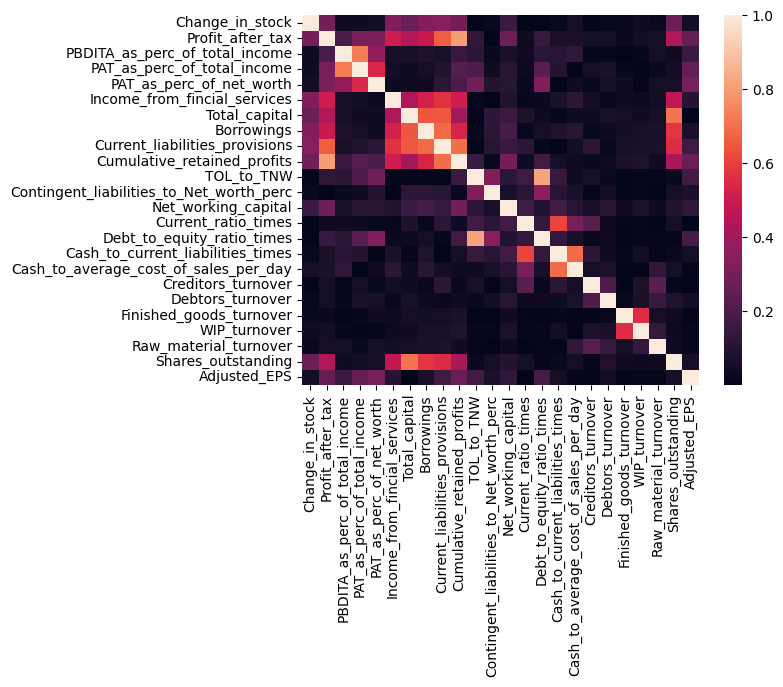

In [39]:
sns.heatmap(X_correlation);

In [40]:
np.fill_diagonal(X_correlation.values, np.nan)

In [41]:
high_corr_pairs = []

In [42]:
for i in range(len(X_correlation.columns)):
    for j in range(len(X_correlation.columns)):
        if X_correlation.iloc[i,j] > 0.8:
            col1 = X_correlation.columns[i]
            col2 = X_correlation.columns[j]
            high_corr_pairs.append((col1, col2, X_correlation.iloc[i,j]))

In [43]:
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Feature 1','Feature 2','Correlation'])

In [44]:
high_corr_df.sort_values(by='Correlation', ascending=False).round(2)

,Feature 1,Feature 2,Correlation
2,TOL_to_TNW,Debt_to_equity_ratio_times,0.82
3,Debt_to_equity_ratio_times,TOL_to_TNW,0.82
0,Profit_after_tax,Cumulative_retained_profits,0.80
1,Cumulative_retained_profits,Profit_after_tax,0.80


### Delete high correlated features

In [45]:
X = X.drop(['TOL_to_TNW','Cumulative_retained_profits'], axis=1)

### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify=y)

In [48]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

## Model 1 - Logistic Regression

In [49]:
features = np.array(X_train.columns)
features

array(['Change_in_stock', 'Profit_after_tax',
       'PBDITA_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Income_from_fincial_services',
       'Total_capital', 'Borrowings', 'Current_liabilities_provisions',
       'Contingent_liabilities_to_Net_worth_perc', 'Net_working_capital',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover', 'Finished_goods_turnover', 'WIP_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'Adjusted_EPS'],
      dtype=object)

In [50]:
"default ~ " + ' + '.join([f'{col}' for col in features])

'default ~ Change_in_stock + Profit_after_tax + PBDITA_as_perc_of_total_income + PAT_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Total_capital + Borrowings + Current_liabilities_provisions + Contingent_liabilities_to_Net_worth_perc + Net_working_capital + Current_ratio_times + Debt_to_equity_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS'

In [51]:
formula = 'default ~ Change_in_stock + Profit_after_tax + PBDITA_as_perc_of_total_income + PAT_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Total_capital + Borrowings + Current_liabilities_provisions + Contingent_liabilities_to_Net_worth_perc + Net_working_capital + Current_ratio_times + Debt_to_equity_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS'
print(formula)

default ~ Change_in_stock + Profit_after_tax + PBDITA_as_perc_of_total_income + PAT_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Total_capital + Borrowings + Current_liabilities_provisions + Contingent_liabilities_to_Net_worth_perc + Net_working_capital + Current_ratio_times + Debt_to_equity_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS


In [52]:
import statsmodels.formula.api as SM

In [53]:
model1 = SM.logit(formula=formula, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.490393
         Iterations 5


In [54]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2956
Method:                           MLE   Df Model:                           22
Date:                Tue, 10 Sep 2024   Pseudo R-squ.:                 0.05189
Time:                        18:40:28   Log-Likelihood:                -1460.9
converged:                       True   LL-Null:                       -1540.8
Covariance Type:            nonrobust   LLR p-value:                 6.323e-23
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -1.5384      0.109    -14.100      0.000      -1.752      -1.325
Change_in_stock                              0.0002      0.001      0.274      0.784      -0.001       0.001
Profit_after_tax                             0.0004      0.000      1.060      0.289      -0.000       0.001
PBDITA_as_perc_of_total_income              -0.0011      0.003     -0.332      0.740      -0.008       0.005
PAT_as_perc_of_total_income                 -0.0048      0.005     -1.044      0.297      -0.014       0.004
PAT_as_perc_of_net_worth                    -0.0069      0.002     -4.005      0.000      -0.010      -0.004
Income_from_fincial_services             -6.302e-05      0.001     -0.112      0.911      -0.001       0.001
Total_capital                                0.0005      0.000      1.361      0.174      -0.000       0.001
Borrowings                               -3.438e-05   5.45e-05     -0.630      0.528      -0.000    7.25e-05
Current_liabilities_provisions           -3.108e-05      0.000     -0.261      0.794      -0.000       0.000
Contingent_liabilities_to_Net_worth_perc  1.697e-06      0.001      0.002      0.998      -0.001       0.001
Net_working_capital                       7.534e-06      0.000      0.041      0.967      -0.000       0.000
Current_ratio_times                         -0.0599      0.041     -1.479      0.139      -0.139       0.020
Debt_to_equity_ratio_times                   0.1055      0.015      6.845      0.000       0.075       0.136
Cash_to_current_liabilities_times            0.0496      0.187      0.265      0.791      -0.316       0.416
Cash_to_average_cost_of_sales_per_day        0.0021      0.001      1.947      0.051   -1.38e-05       0.004
Creditors_turnover                           0.0063      0.002      2.720      0.007       0.002       0.011
Debtors_turnover                            -0.0015      0.002     -0.602      0.547      -0.006       0.003
Finished_goods_turnover                      0.0003      0.001      0.486      0.627      -0.001       0.001
WIP_turnover                                -0.0002      0.002     -0.134      0.893      -0.004       0.003
Raw_material_turnover                        0.0001      0.003      0.037      0.971      -0.006       0.006
Shares_outstanding                       -2.041e-09      2e-09     -1.023      0.306   -5.95e-09    1.87e-09
Adjusted_EPS                                -0.0003      0.002     -0.153      0.878      -0.005       0.004
============================================================================================================
"""

### Refining Model 1

#### Removing features with high P value

In [55]:
formula_1a = 'default ~ PAT_as_perc_of_total_income + PAT_as_perc_of_net_worth + Debt_to_equity_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover'

In [56]:
model_1a = SM.logit(formula=formula_1a, data=df_train).fit()

Optimization terminated successfully.
         Current function value: 0.491586
         Iterations 5


In [57]:
model_1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2979
Model:                          Logit   Df Residuals:                     2973
Method:                           MLE   Df Model:                            5
Date:                Tue, 10 Sep 2024   Pseudo R-squ.:                 0.04959
Time:                        18:40:28   Log-Likelihood:                -1464.4
converged:                       True   LL-Null:                       -1540.8
Covariance Type:            nonrobust   LLR p-value:                 3.365e-31
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -1.6013      0.070    -22.771      0.000      -1.739      -1.463
PAT_as_perc_of_total_income              -0.0055      0.003     -1.643      0.100      -0.012       0.001
PAT_as_perc_of_net_worth                 -0.0064      0.002     -3.920      0.000      -0.010      -0.003
Debt_to_equity_ratio_times                0.1065      0.014      7.580      0.000       0.079       0.134
Cash_to_average_cost_of_sales_per_day     0.0018      0.001      2.455      0.014       0.000       0.003
Creditors_turnover                        0.0049      0.002      2.315      0.021       0.001       0.009
=========================================================================================================
"""

## Predictions on Model 1

In [95]:
y_prob_pred_train = model_1a.predict(df_train)

In [96]:
y_class_pred = []

for i in range(0, len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > 0.5:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [97]:
from sklearn import metrics

In [98]:
metrics.confusion_matrix(df_train['default'], y_class_pred)

array([[2317,   29],
       [ 567,   66]])

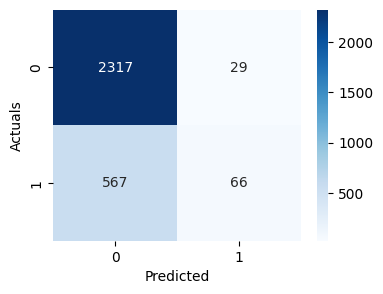

In [102]:
plt.figure(figsize=(4,3))
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

In [63]:
print(metrics.classification_report(df_train['default'], y_class_pred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89      2346
           1       0.69      0.10      0.18       633

    accuracy                           0.80      2979
   macro avg       0.75      0.55      0.53      2979
weighted avg       0.78      0.80      0.74      2979



### Finding the Optimal Threshold

In [64]:
from sklearn.metrics import roc_curve

In [65]:
fpr, tpr, thresholds = roc_curve(df_train['default'], y_prob_pred_train)

In [66]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.23466297819580767

### Predictions using optimal threshold

In [103]:
y_class_pred = []

for i in range(0, len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i] > 0.221:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [106]:
metrics.confusion_matrix(df_train['default'],y_class_pred)

array([[1899,  447],
       [ 397,  236]])

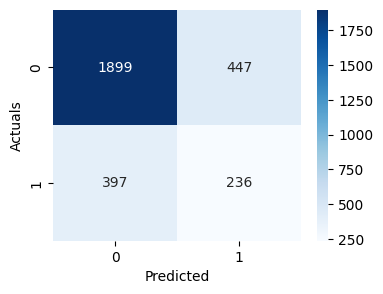

In [104]:
plt.figure(figsize=(4,3))
sns.heatmap((metrics.confusion_matrix(df_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

In [69]:
print(metrics.classification_report(df_train['default'], y_class_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2346
           1       0.35      0.37      0.36       633

    accuracy                           0.72      2979
   macro avg       0.59      0.59      0.59      2979
weighted avg       0.72      0.72      0.72      2979



### Predictions on Test set

In [70]:
y_prob_pred_test = model_1a.predict(df_test)

In [107]:
y_class_pred = []

for i in range(0, len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i] > 0.221:
        a=1
    else:
        a=0
    y_class_pred.append(a)

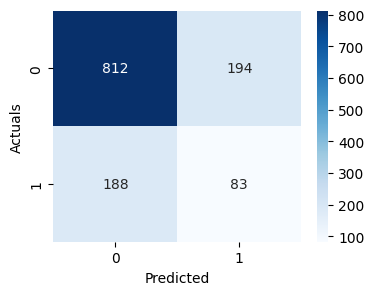

In [108]:
plt.figure(figsize=(4,3))
sns.heatmap((metrics.confusion_matrix(df_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

In [73]:
print(metrics.classification_report(df_test['default'], y_class_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1006
           1       0.30      0.31      0.30       271

    accuracy                           0.70      1277
   macro avg       0.56      0.56      0.56      1277
weighted avg       0.70      0.70      0.70      1277



## Model 2 - Linear Discriminant Analysis

In [74]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [75]:
LDA = LinearDiscriminantAnalysis()

In [76]:
lda_model = LDA.fit(X_train, y_train)

In [77]:
lda_pred_train = lda_model.predict(X_train)
lda_pred_test = lda_model.predict(X_test)

In [78]:
metrics.confusion_matrix(y_train, lda_pred_train)

array([[2305,   41],
       [ 550,   83]])

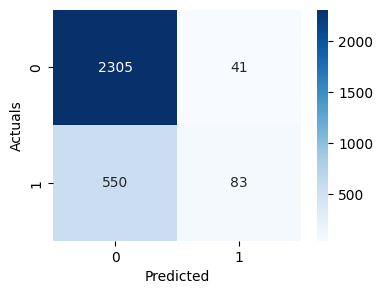

In [109]:
plt.figure(figsize=(4,3))
sns.heatmap((metrics.confusion_matrix(y_train, lda_pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

In [79]:
metrics.confusion_matrix(y_test, lda_pred_test)

array([[985,  21],
       [240,  31]])

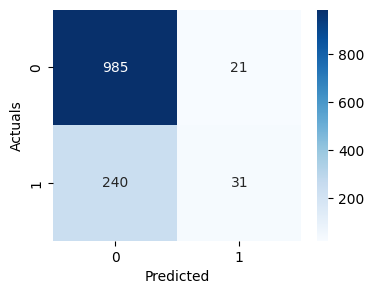

In [110]:
plt.figure(figsize=(4,3))
sns.heatmap((metrics.confusion_matrix(y_test, lda_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

In [80]:
print(metrics.classification_report(y_train, lda_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2346
           1       0.67      0.13      0.22       633

    accuracy                           0.80      2979
   macro avg       0.74      0.56      0.55      2979
weighted avg       0.78      0.80      0.74      2979



In [81]:
print(metrics.classification_report(y_test, lda_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1006
           1       0.60      0.11      0.19       271

    accuracy                           0.80      1277
   macro avg       0.70      0.55      0.54      1277
weighted avg       0.76      0.80      0.74      1277



In [121]:
feature_importance = np.abs(lda_model.coef_[0])

In [123]:
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

In [132]:
features_df.sort_values(by='Importance', ascending=False).round(3)

,Feature,Importance
12,Debt_to_equity_ratio_times,0.145
11,Current_ratio_times,0.059
13,Cash_to_current_liabilities_times,0.048
4,PAT_as_perc_of_net_worth,0.008
15,Creditors_turnover,0.007
3,PAT_as_perc_of_total_income,0.005
14,Cash_to_average_cost_of_sales_per_day,0.002
16,Debtors_turnover,0.001
2,PBDITA_as_perc_of_total_income,0.001
1,Profit_after_tax,0.000


## Model 3 - Random Forest

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
param_grid = {
    'max_depth': [3,5,7,9],
    'min_samples_leaf': [5, 10, 15, 20],
    'min_samples_split': [15, 30, 45, 60],
    'n_estimators': [25, 50, 75]
}

In [84]:
rfcl = RandomForestClassifier()

In [85]:
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid)

In [86]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [15, 30, 45, 60],
                         'n_estimators': [25, 50, 75]})

In [87]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 15,
 'n_estimators': 50}

In [88]:
best_grid = grid_search.best_estimator_

In [89]:
rf_pred_train = best_grid.predict(X_train)
rf_pred_test = best_grid.predict(X_test)

In [90]:
metrics.confusion_matrix(y_train, rf_pred_train)

array([[2313,   33],
       [ 539,   94]])

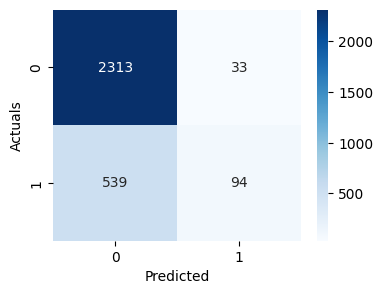

In [111]:
plt.figure(figsize=(4,3))
sns.heatmap((metrics.confusion_matrix(y_train, rf_pred_train)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

In [91]:
metrics.confusion_matrix(y_test, rf_pred_test)

array([[985,  21],
       [246,  25]])

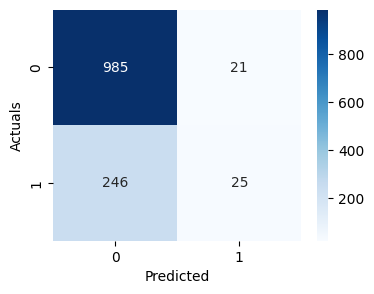

In [112]:
plt.figure(figsize=(4,3))
sns.heatmap((metrics.confusion_matrix(y_test, rf_pred_test)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals');

In [92]:
print(metrics.classification_report(y_train, rf_pred_train))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2346
           1       0.74      0.15      0.25       633

    accuracy                           0.81      2979
   macro avg       0.78      0.57      0.57      2979
weighted avg       0.80      0.81      0.75      2979



In [93]:
print(metrics.classification_report(y_test, rf_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1006
           1       0.54      0.09      0.16       271

    accuracy                           0.79      1277
   macro avg       0.67      0.54      0.52      1277
weighted avg       0.75      0.79      0.73      1277



In [128]:
feature_importance = best_grid.feature_importances_

In [133]:
features_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

In [135]:
features_df.sort_values(by='Importance', ascending=False).round(3)

,Feature,Importance
12,Debt_to_equity_ratio_times,0.177
4,PAT_as_perc_of_net_worth,0.148
1,Profit_after_tax,0.075
21,Adjusted_EPS,0.062
3,PAT_as_perc_of_total_income,0.061
6,Total_capital,0.051
11,Current_ratio_times,0.049
15,Creditors_turnover,0.048
2,PBDITA_as_perc_of_total_income,0.043
14,Cash_to_average_cost_of_sales_per_day,0.029
